In [2]:
import pandas as pd
import pymorphy3 as pm3
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy
import matplotlib.pyplot as plt


test_data = pd.read_csv('harderTest.csv')
real_data = pd.read_csv('normalized.csv')



In [3]:
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2, 5))
tf_idf_matrix = vectorizer.fit_transform(real_data['overview'])



In [4]:
print(tf_idf_matrix)



<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2392147 stored elements and shape (2000, 156415)>
  Coords	Values
  (0, 31705)	0.018868407741282275
  (0, 136308)	0.02305842016140807
  (0, 138458)	0.045723884209491215
  (0, 38193)	0.011316807865706522
  (0, 24028)	0.018577180721782993
  (0, 82028)	0.029717730940311087
  (0, 127814)	0.015716700805346352
  (0, 52031)	0.007114615522982278
  (0, 110311)	0.009646663235667407
  (0, 12927)	0.03349725158664201
  (0, 150932)	0.043341902549100086
  (0, 90669)	0.027751847570098704
  (0, 43140)	0.026158629807543635
  (0, 60204)	0.05343058653815045
  (0, 3569)	0.035465848378041974
  (0, 45621)	0.036554408675706
  (0, 152352)	0.05011652553109334
  (0, 137640)	0.02102822707515873
  (0, 113100)	0.01438775422752998
  (0, 49258)	0.0138551459243015
  (0, 71810)	0.015151092124258343
  (0, 87974)	0.015111354599855539
  (0, 7793)	0.05912524905537097
  (0, 97477)	0.05840446421563471
  (0, 29899)	0.02934846677713113
  :	:
  (1999, 106969)	0.05537

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

transformed_data = pca.fit_transform(tf_idf_matrix)



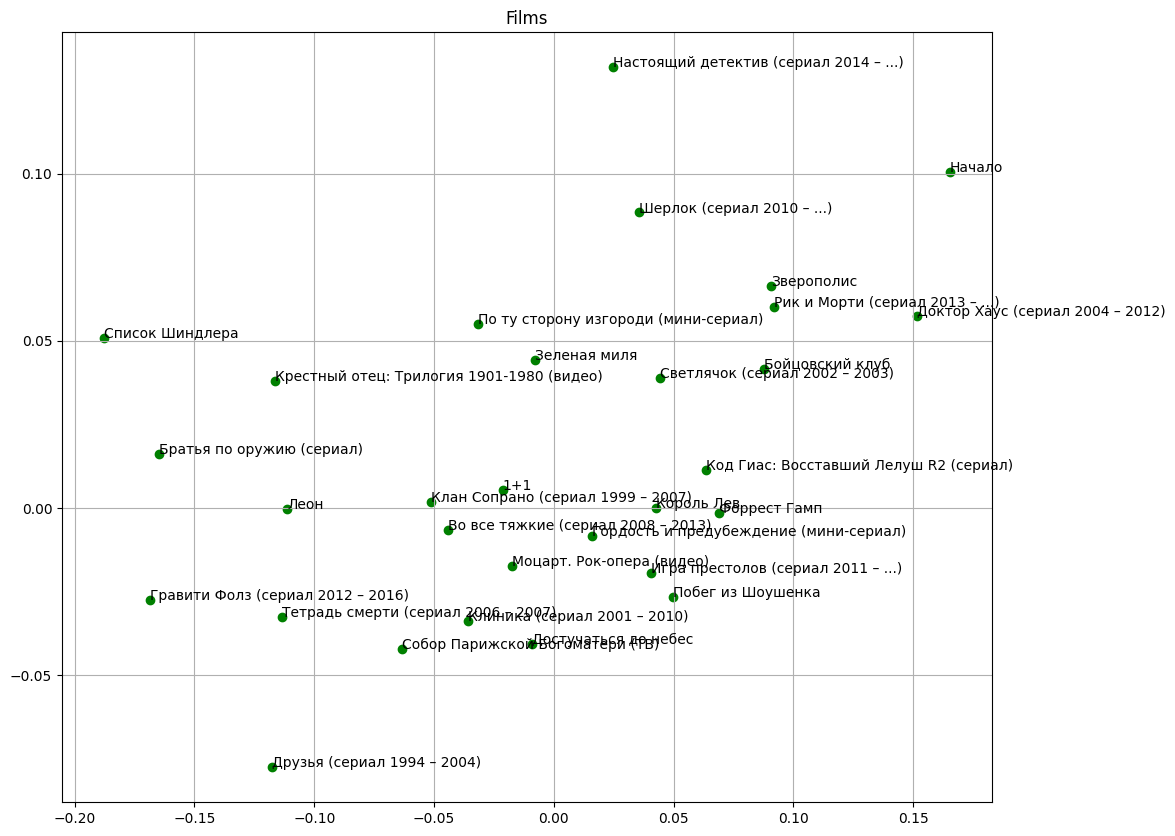

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))


labels = real_data['movie'][:30]

x_coords = transformed_data[:30, 0]
y_coords = transformed_data[:30, 1]

for i, label in enumerate(labels):
    ax.annotate(label, (x_coords[i], y_coords[i]))

ax.scatter(x_coords, y_coords, c='g', marker='o')
ax.set_title("Films")

ax.grid(True)

plt.show()

In [7]:
from preprocessFunc import normalize_string
morph = pm3.MorphAnalyzer()

query = test_data['query']
TP = test_data['relevant_movie']
normalized_query = [normalize_string(i) for i in query]

In [11]:
from interface import find_similar_movies

test_with_result = test_data.assign(answer = [find_similar_movies(i, 'normalized.csv', vectorizer) for i in normalized_query])

test_with_result

,Unnamed: 0,query,relevant_movie,answer
0,0,герой в маске борется с преступностью но сталк...,Темный рыцарь,Темный рыцарь
1,1,римского генерала предают и убивают его семью ...,Гладиатор,Гладиатор
2,2,в будущем где земля умирает группа исследовате...,Интерстеллар,Интерстеллар
3,3,страдающий от бессонницы офисный клерк знакоми...,Бойцовский клуб,Бойцовский клуб
4,4,два фокусника в викторианском лондоне вступают...,Престиж,Престиж
5,5,агент мафии в рядах полиции и полицейский внед...,Отступники,Отступники
6,6,молодой мошенник виртуозно подделывает чеки и ...,Поймай меня если сможешь,На гребне волны
7,7,пара решает стереть друг друга из памяти после...,Вечное сияние чистого разума,"Влюбись в меня, если осмелишься"
8,8,мужчина обнаруживает что вся его жизнь это реа...,Шоу Трумана,Шоу Трумана
9,9,два киборга из будущего прибывают в настоящее ...,Терминатор 2: Судный день,Терминатор 2: Судный день


In [12]:
from preprocessFunc import string_preparation

temp = test_with_result.assign(result = [int(string_preparation(test_with_result['relevant_movie'][i]).strip() == string_preparation(test_with_result['answer'][i]).strip())  for i in range(test_with_result.shape[0])]) 
temp

,Unnamed: 0,query,relevant_movie,answer,result
0,0,герой в маске борется с преступностью но сталк...,Темный рыцарь,Темный рыцарь,1
1,1,римского генерала предают и убивают его семью ...,Гладиатор,Гладиатор,1
2,2,в будущем где земля умирает группа исследовате...,Интерстеллар,Интерстеллар,1
3,3,страдающий от бессонницы офисный клерк знакоми...,Бойцовский клуб,Бойцовский клуб,1
4,4,два фокусника в викторианском лондоне вступают...,Престиж,Престиж,1
5,5,агент мафии в рядах полиции и полицейский внед...,Отступники,Отступники,1
6,6,молодой мошенник виртуозно подделывает чеки и ...,Поймай меня если сможешь,На гребне волны,0
7,7,пара решает стереть друг друга из памяти после...,Вечное сияние чистого разума,"Влюбись в меня, если осмелишься",0
8,8,мужчина обнаруживает что вся его жизнь это реа...,Шоу Трумана,Шоу Трумана,1
9,9,два киборга из будущего прибывают в настоящее ...,Терминатор 2: Судный день,Терминатор 2: Судный день,1


result
1    11
0     9
Name: count, dtype: int64


<BarContainer object of 2 artists>

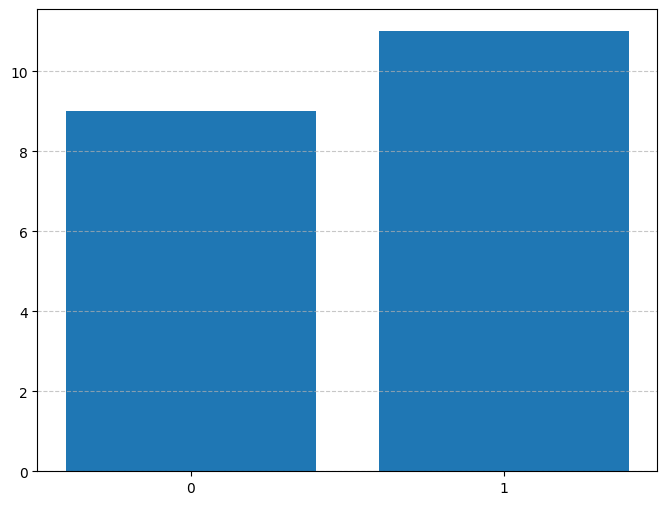

In [ ]:
value_counts = temp['result'].value_counts()

print(value_counts)

categories = value_counts.index
counts = value_counts.values

fig, ax = plt.subplots(figsize = (8, 6))

ax.set_xticks(categories)

ax.set_yticks(range(0, max(counts)+1, 2))
ax.grid(axis='y', linestyle = '--', alpha = 0.7)

ax.bar(categories, counts)


In [ ]:
accuracy = value_counts[1] / (value_counts[0]+value_counts[1])


accuracy

0.55

In [13]:
import os
from fine_tuneFastText import fine_tune_model
import fasttext
import numpy as np

if not os.path.exists('fasttext_vectors.npy'):
    
    if os.path.exists('fine_tuned_movie_model.bin'):
        FINE_TUNED_MODEL_FILE = 'fine_tuned_movie_model.bin'

        ft_model = fasttext.load_model(FINE_TUNED_MODEL_FILE)


        def vectorize_text(text: str, model):
            words = text.split()
            
            word_vectors = [model.get_word_vector(word).astype(float) for word in words if word in model] 

            if not word_vectors:
                return np.zeros(model.get_dimension())
                
            return np.mean(word_vectors, axis=0)

        data_with_vectors = real_data.assign(vectors = [vectorize_text(overview.lower(), ft_model) for overview in real_data['overview']])

        data_with_vectors = data_with_vectors.drop(columns='overview')

        np.save("fasttext_vectors.npy",  data_with_vectors['vectors'].tolist())

    else:
        FINE_TUNED_MODEL_FILE = 'fine_tuned_movie_model.bin'
        try:
            fine_tune_model()
        except Exception as e:
            print(e)
else:
    FINE_TUNED_MODEL_FILE = 'fine_tuned_movie_model.bin'
    ft_model = fasttext.load_model(FINE_TUNED_MODEL_FILE)



ValueError: fine_tuned_movie_model.bin cannot be opened for loading!

In [ ]:
from interface import find_similar_by_fasttext
import pymorphy3 as pm


vectors = np.load('fasttext_vectors.npy')

print(type(vectors[0]))




<class 'numpy.ndarray'>


In [ ]:
print("Соседи для слова 'робот':", ft_model.get_nearest_neighbors('робот'))
print("Соседи для слова 'учитель':", ft_model.get_nearest_neighbors('учитель'))
print("Соседи для слова 'космос':", ft_model.get_nearest_neighbors('космос'))

Соседи для слова 'робот': [(0.9972509741783142, 'Дробот'), (0.997062623500824, 'Пылесос-робот'), (0.996941089630127, 'Микро-робот'), (0.9965705871582031, 'пылесос-робот'), (0.9965490698814392, 'робот2'), (0.9965166449546814, 'робот.'), (0.9964928030967712, 'роботі'), (0.9964902997016907, 'робот-'), (0.9964717030525208, 'роботу'), (0.9962114095687866, 'Мосробот')]
Соседи для слова 'учитель': [(0.9987034797668457, '-учитель'), (0.9986779689788818, 'Мучитель'), (0.9974782466888428, 'Самоучитель'), (0.9974643588066101, 'сСамоучитель'), (0.9971566796302795, 'Поручитель'), (0.9963673949241638, 'мучитель'), (0.9961344003677368, 'вчитель'), (0.9960883855819702, '.Учитель'), (0.9960813522338867, 'Учитель'), (0.9960809946060181, '-Учитель')]
Соседи для слова 'космос': [(0.9994879961013794, 'космосВсе'), (0.9994445443153381, 'космос.'), (0.9994441270828247, 'космосу'), (0.9994173049926758, 'космос30'), (0.999413013458252, 'космосОбои'), (0.9992614984512329, 'космосПро'), (0.9991891980171204, 'кос

In [ ]:

from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format("cc.ru.300.vec", binary = False)

model.save_word2vec_format('fasttextModel.bin', binary = True)




KeyboardInterrupt: 

In [ ]:
model = KeyedVectors.load_word2vec_format('fasttextModel.bin', binary= True)

model.most_similar('Кино', topn= 50)



[('кино', 0.5950142741203308),
 ('Фильмы', 0.5726176500320435),
 ('Кинематограф', 0.5665013194084167),
 ('КИНО', 0.5553529858589172),
 ('Музыка', 0.5458964705467224),
 ('Бесплатно.Кино', 0.5325835943222046),
 ('Кинофильмы', 0.52817702293396),
 ('Телевидение', 0.5239943861961365),
 ('Арт-хаус', 0.5136026740074158),
 ('Немое', 0.5135851502418518),
 ('киноКино', 0.512535572052002),
 ('Киношка', 0.5108202695846558),
 ('Телевиденье', 0.5105417966842651),
 ('Культура', 0.505975067615509),
 ('Мультфильмы', 0.5054133534431458),
 ('Синемания', 0.5051438808441162),
 ('Синематека', 0.5042387247085571),
 ('Кинозал', 0.5034065246582031),
 ('Кинематографа', 0.5029842853546143),
 ('Киноклуб', 0.5019508600234985),
 ('Кинематография', 0.5017313957214355),
 ('Телефон.Кино', 0.49945467710494995),
 ('Мультики', 0.49790629744529724),
 ('Мультиплекс', 0.49432826042175293),
 ('Симфоническое', 0.4932675361633301),
 ('FYLM.ORG', 0.49255767464637756),
 ('Короткометражное', 0.49114206433296204),
 ('Сериалы', 0.4

In [16]:
from sklearn.metrics.pairwise import cosine_similarity
from preprocessFunc import normalize_string
import numpy as np

# Загружаем векторы FastText (предполагаем, что они сохранены в fasttext_vectors.npy как в коде выше)
# Если переменная data_with_vectors уже есть в памяти, используем её
try:
    ft_vectors = np.load('fasttext_vectors.npy')
except:
    # Если файл не найден, используем текущий data_with_vectors из памяти ноутбука
    ft_vectors = np.array(data_with_vectors['vectors'].tolist())

# Матрица TF-IDF (уже посчитана в начале ноутбука как tf_idf_matrix)
tfidf_vectors = tf_idf_matrix

def vectorize_text(text: str, model):
            words = text.split()
            
            word_vectors = [model.get_word_vector(word).astype(float) for word in words if word in model] 

            if not word_vectors:
                return np.zeros(model.get_dimension())
                
            return np.mean(word_vectors, axis=0)
def get_hybrid_recommendations(query, top_k=1, alpha=0.5):
    # 1. Векторизация запроса TF-IDF
    q_tfidf = vectorizer.transform([normalize_string(query)])
    sim_tfidf = cosine_similarity(q_tfidf, tfidf_vectors).flatten()
    
    # 2. Векторизация запроса FastText
    # Используем функцию vectorize_text из предыдущих ячеек или пишем заново
    q_ft = vectorize_text(normalize_string(query), ft_model).reshape(1, -1)
    sim_ft = cosine_similarity(q_ft, ft_vectors).flatten()
    
    # 3. Комбинация (умножение вероятностей/схожести часто дает лучший результат для фильтрации шума)
    # Можно также использовать взвешенную сумму: alpha * sim_tfidf + (1-alpha) * sim_ft
    hybrid_score = sim_tfidf * sim_ft
    
    # Сортировка
    top_indices = hybrid_score.argsort()[::-1][:top_k]
    
    return real_data.iloc[top_indices]['movie'].values

# Оценка точности
def evaluate_model(test_df, method_func, k=1):
    correct = 0
    for i, row in test_df.iterrows():
        query = row['query']
        target = row['relevant_movie']
        
        predictions = method_func(query, top_k=k)
        
        # Сравнение строк (нормализация)
        target_norm = normalize_string(target).strip()
        preds_norm = [normalize_string(p).strip() for p in predictions]
        
        if target_norm in preds_norm:
            correct += 1
            
    return correct / len(test_df)

acc_1 = evaluate_model(test_data, get_hybrid_recommendations, k=1)
acc_5 = evaluate_model(test_data, get_hybrid_recommendations, k=5)

print(f"Hybrid (FastText * TF-IDF) Accuracy@1: {acc_1:.2f}")
print(f"Hybrid (FastText * TF-IDF) Accuracy@5: {acc_5:.2f}")

NameError: name 'ft_model' is not defined